# Linear Regression with Standardized Data

In [ ]:
install.packages('Metrics') 
install.packages('rpart.plot')
install.packages("caTools")
install.packages("data.table")
install.packages("car")
install.packages('bit64')

In [22]:
library(car)
library(data.table)
library(rpart)
library(rpart.plot) 
library(caTools)
library('Metrics')

In [23]:
#----------Import and clean data-------------
# Set working directory as file that dataset is in and import using fread
setwd('C:\\Users\\YI XUAN\\Desktop\\NTU\\AY2021-2022 SEM 1\\BC2406 Analytics I - Visual & Predictive Techniques\\AY21 Team Assignment and Project\\Sem09 Team06\\Notebooks datasets dictonary\\Noteb datasets dict')
data <- fread("standardised_final_asia_dataset.csv")

# Remove V1,Countries,Years since not being used in our linear regression model
data0 = subset(data, select = -c(V1,Countries,Years) )

# Ensure standardization of format for all NULL data
data0[data0 == "NULL"] = NA

In [24]:
# Omit all rows with NA values for clean dataset
data0<- na.omit(data0) # 98/150 rows remaining
str(data0) # views list of variables and their datatypes

Classes 'data.table' and 'data.frame':	98 obs. of  21 variables:
 $ GDP_Growth                       : num  2.3 2.77 2.19 2.53 2.58 ...
 $ Market_Size                      : num  1.21 1.16 1.11 1.14 1.09 ...
 $ Life_Exp                         : num  1.35 1.35 1.34 1.32 1.29 ...
 $ Mean_Years_of_Schooling          : num  1.49 1.45 1.41 1.34 1.3 ...
 $ Internet_Penetration             : num  1.37 1.37 1.3 1.28 1.27 ...
 $ Gov_Indicator                    : num  1.44 1.46 1.52 1.49 1.43 ...
 $ Trade_Openness                   : num  -0.491 -0.535 -0.518 -0.495 -0.519 ...
 $ Labour_Force                     : num  0.226 0.193 0.215 0.175 0.208 ...
 $ Domestic_credit_to_private_sector: num  1.02 1.061 0.945 0.796 0.726 ...
 $ inflation                        : num  -0.618 -0.83 -0.757 -0.447 -0.459 ...
 $ GNI                              : num  1.24 1.2 1.16 1.17 1.13 ...
 $ BoT                              : num  -0.0174 -0.3534 -0.2644 -0.1368 -0.2387 ...
 $ Child_Mortality              

In [25]:
data1 <- lapply(data0,as.numeric)

In [26]:
# Create linear model with lm() to test for variables with multicollinnearity
# Set y variable as GDP_Growth
m1 <- lm(GDP_Growth ~ ., data = data1)
vif(m1) # Remove market_size 1102.111448

Market_Size                          Life_Exp 
                      1102.111448                        101.408594 
          Mean_Years_of_Schooling              Internet_Penetration 
                        68.904140                         26.986826 
                    Gov_Indicator                    Trade_Openness 
                       203.830412                         47.089994 
                     Labour_Force Domestic_credit_to_private_sector 
                         9.379709                         33.522189 
                        inflation                               GNI 
                         3.444617                       1836.146890 
                              BoT                   Child_Mortality 
                        23.989433                         73.580819 
                              HDI                     Pol_Stability 
                       357.488889                         37.596390 
                              CPI                         Urban_pop 
                       193.464131                         87.664357 
                     Renew_Energy                     CO2_emissions 
                        27.030407                         39.863001 
                      ind_val_add                 unemployment_rate 
                        27.922525                          7.317439

In [27]:
m1 <- update(m1, paste0(".~. - ",'Market_Size'))
vif(m1) #  Remove HDI 304.357766

Life_Exp           Mean_Years_of_Schooling 
                        90.466628                         66.863686 
             Internet_Penetration                     Gov_Indicator 
                        25.037351                        203.807437 
                   Trade_Openness                      Labour_Force 
                        34.753174                          6.929995 
Domestic_credit_to_private_sector                         inflation 
                        32.561718                          3.444468 
                              GNI                               BoT 
                       155.481677                         21.241316 
                  Child_Mortality                               HDI 
                        65.532564                        304.357766 
                    Pol_Stability                               CPI 
                        37.182668                        187.240015 
                        Urban_pop                      Renew_Energy 
                        58.719410                         26.317132 
                    CO2_emissions                       ind_val_add 
                        36.835165                         27.460966 
                unemployment_rate 
                         7.304945

In [28]:
m1 <- update(m1, paste0(".~. - ",'HDI'))
vif(m1) # Remove Gov_Indicator 203.787382

Life_Exp           Mean_Years_of_Schooling 
                        89.139285                         39.485006 
             Internet_Penetration                     Gov_Indicator 
                        22.934674                        203.787382 
                   Trade_Openness                      Labour_Force 
                        20.671103                          5.713014 
Domestic_credit_to_private_sector                         inflation 
                        30.138661                          3.444163 
                              GNI                               BoT 
                        89.904203                         20.772601 
                  Child_Mortality                     Pol_Stability 
                        33.299260                         32.818691 
                              CPI                         Urban_pop 
                       154.252035                         42.509640 
                     Renew_Energy                     CO2_emissions 
                        25.577974                         33.122491 
                      ind_val_add                 unemployment_rate 
                        25.431464                          7.300792

In [29]:
m1 <- update(m1, paste0(".~. - ",'Gov_Indicator'))
vif(m1) # Remove Life_Exp 88.091894

m1 <- update(m1, paste0(".~. - ",'Life_Exp'))
vif(m1) # Remove CPI 52.486238

m1 <- update(m1, paste0(".~. - ",'CPI'))
vif(m1) # Remove GNI 49.088552

m1 <- update(m1, paste0(".~. - ",'GNI'))
vif(m1) # Remove CO2_emissions 24.505653

m1 <- update(m1, paste0(".~. - ",'CO2_emissions'))
vif(m1) # Remove Mean_Years_of_Schooling 20.215001

m1 <- update(m1, paste0(".~. - ",'Mean_Years_of_Schooling'))
vif(m1) # Remove Pol_Stability 15.451475

m1 <- update(m1, paste0(".~. - ",'Pol_Stability'))
vif(m1) # Remove BoT 13.031969

m1 <- update(m1, paste0(".~. - ",'BoT'))
vif(m1) # Remove Internet_Penetration 10.040296

m1 <- update(m1, paste0(".~. - ",'Internet_Penetration'))
vif(m1) # Now highest vif is Domestic_credit_to_private_sector 7.139584 < 10

Life_Exp           Mean_Years_of_Schooling 
                        88.091894                         38.626533 
             Internet_Penetration                    Trade_Openness 
                        20.701057                         20.135542 
                     Labour_Force Domestic_credit_to_private_sector 
                         5.528266                         28.629460 
                        inflation                               GNI 
                         3.395821                         88.005792 
                              BoT                   Child_Mortality 
                        20.760415                         33.297450 
                    Pol_Stability                               CPI 
                        26.278532                         68.489232 
                        Urban_pop                      Renew_Energy 
                        39.420754                         24.295538 
                    CO2_emissions                       ind_val_add 
                        32.247016                         23.319381 
                unemployment_rate 
                         7.300187

Mean_Years_of_Schooling              Internet_Penetration 
                        35.493760                         19.174986 
                   Trade_Openness                      Labour_Force 
                        14.115783                          4.440698 
Domestic_credit_to_private_sector                         inflation 
                        17.006947                          3.359244 
                              GNI                               BoT 
                        49.369640                         20.180390 
                  Child_Mortality                     Pol_Stability 
                        23.428557                         19.544701 
                              CPI                         Urban_pop 
                        52.486238                         39.328821 
                     Renew_Energy                     CO2_emissions 
                        22.799406                         30.459702 
                      ind_val_add                 unemployment_rate 
                        16.556133                          6.513286

Mean_Years_of_Schooling              Internet_Penetration 
                        23.597707                         17.544052 
                   Trade_Openness                      Labour_Force 
                        13.954911                          4.177011 
Domestic_credit_to_private_sector                         inflation 
                        14.361259                          3.337385 
                              GNI                               BoT 
                        49.088552                         17.606717 
                  Child_Mortality                     Pol_Stability 
                        22.354891                         18.921578 
                        Urban_pop                      Renew_Energy 
                        29.253043                         19.518874 
                    CO2_emissions                       ind_val_add 
                        27.172895                         10.915506 
                unemployment_rate 
                         5.334321

Mean_Years_of_Schooling              Internet_Penetration 
                        20.348539                         15.095787 
                   Trade_Openness                      Labour_Force 
                        11.419500                          4.171537 
Domestic_credit_to_private_sector                         inflation 
                        12.765370                          3.287420 
                              BoT                   Child_Mortality 
                        14.794519                         19.017719 
                    Pol_Stability                         Urban_pop 
                        18.789314                          9.498816 
                     Renew_Energy                     CO2_emissions 
                        19.300031                         24.505653 
                      ind_val_add                 unemployment_rate 
                         4.419997                          5.242379

Mean_Years_of_Schooling              Internet_Penetration 
                        20.215001                         14.814967 
                   Trade_Openness                      Labour_Force 
                        11.418182                          4.125122 
Domestic_credit_to_private_sector                         inflation 
                        11.238375                          3.254066 
                              BoT                   Child_Mortality 
                        14.466947                         18.227747 
                    Pol_Stability                         Urban_pop 
                        18.723070                          9.286097 
                     Renew_Energy                       ind_val_add 
                         2.624567                          3.799504 
                unemployment_rate 
                         4.252398

Internet_Penetration                    Trade_Openness 
                        12.776357                         11.407204 
                     Labour_Force Domestic_credit_to_private_sector 
                         3.918801                          8.400533 
                        inflation                               BoT 
                         3.207925                         13.063175 
                  Child_Mortality                     Pol_Stability 
                        11.391023                         15.451475 
                        Urban_pop                      Renew_Energy 
                         7.829899                          2.624165 
                      ind_val_add                 unemployment_rate 
                         3.452832                          3.757988

Internet_Penetration                    Trade_Openness 
                        10.610333                         11.235843 
                     Labour_Force Domestic_credit_to_private_sector 
                         3.295724                          8.343127 
                        inflation                               BoT 
                         2.877336                         13.031969 
                  Child_Mortality                         Urban_pop 
                         5.120428                          7.792417 
                     Renew_Energy                       ind_val_add 
                         2.452057                          2.995406 
                unemployment_rate 
                         2.917726

Internet_Penetration                    Trade_Openness 
                        10.040296                          2.315913 
                     Labour_Force Domestic_credit_to_private_sector 
                         3.138028                          8.223940 
                        inflation                   Child_Mortality 
                         2.605301                          5.104822 
                        Urban_pop                      Renew_Energy 
                         5.829926                          2.416194 
                      ind_val_add                 unemployment_rate 
                         2.568027                          2.912704

Trade_Openness                      Labour_Force 
                         2.292794                          3.032417 
Domestic_credit_to_private_sector                         inflation 
                         7.139584                          2.527602 
                  Child_Mortality                         Urban_pop 
                         4.897044                          3.410812 
                     Renew_Energy                       ind_val_add 
                         2.395408                          2.400657 
                unemployment_rate 
                         2.912518

In [30]:
# Update by removing the above removed variables and assign back to data0
data0 = subset(data0, select = -c(Market_Size,HDI,Gov_Indicator,Life_Exp,CPI,GNI,CO2_emissions,Mean_Years_of_Schooling,Pol_Stability,BoT,Internet_Penetration) )  

In [31]:
#---------------statistical significance------------------
# Checking adjusted r^2 of full cleaned data
m1 <- lm(GDP_Growth ~ ., data = data0)
summary(m1) # Adjusted r2:0.6229


Call:
lm(formula = GDP_Growth ~ ., data = data0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5098 -0.6372 -0.0094  0.6330  2.9197 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.70702    0.13526  34.799  < 2e-16 ***
Trade_Openness                     0.75806    0.17396   4.358 3.55e-05 ***
Labour_Force                       0.46158    0.19749   2.337   0.0217 *  
Domestic_credit_to_private_sector  0.33792    0.33880   0.997   0.3213    
inflation                         -0.42573    0.23919  -1.780   0.0785 .  
Child_Mortality                    1.25506    0.28301   4.435 2.65e-05 ***
Urban_pop                         -1.39097    0.22980  -6.053 3.40e-08 ***
Renew_Energy                       0.08093    0.16483   0.491   0.6247    
ind_val_add                        0.86036    0.18665   4.609 1.36e-05 ***
unemployment_rate                  1.38948    0.23550   5.900 6.63e-08 ***
---
Signif. code

In [32]:
# Remove least significant variable, until right before adjusted r^2 decreases
m1 <- update(m1, paste0(".~. - ",'Renew_Energy')) #p-value: 0.6247
summary(m1) # Adjusted r2:0.6261


Call:
lm(formula = GDP_Growth ~ Trade_Openness + Labour_Force + Domestic_credit_to_private_sector + 
    inflation + Child_Mortality + Urban_pop + ind_val_add + unemployment_rate, 
    data = data0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4556 -0.6403 -0.0204  0.5905  2.8930 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.6969     0.1331  35.289  < 2e-16 ***
Trade_Openness                      0.7659     0.1725   4.441 2.57e-05 ***
Labour_Force                        0.4593     0.1966   2.336   0.0217 *  
Domestic_credit_to_private_sector   0.4409     0.2649   1.664   0.0996 .  
inflation                          -0.4387     0.2367  -1.854   0.0671 .  
Child_Mortality                     1.3196     0.2496   5.288 8.76e-07 ***
Urban_pop                          -1.4338     0.2117  -6.772 1.32e-09 ***
ind_val_add                         0.9065     0.1605   5.647 1.92e-07 ***
unemployment_rat

In [33]:
# Update by removing the above removed variables and assign back to data0
data0 = subset(data0, select = -Renew_Energy )  

# View final variable list
summary(data0)

   GDP_Growth     Trade_Openness      Labour_Force      
 Min.   :0.3232   Min.   :-0.78051   Min.   :-1.955630  
 1st Qu.:3.5248   1st Qu.:-0.53987   1st Qu.:-0.945243  
 Median :5.0072   Median :-0.45064   Median : 0.183892  
 Mean   :4.8234   Mean   : 0.08421   Mean   :-0.004477  
 3rd Qu.:6.4876   3rd Qu.: 0.54520   3rd Qu.: 0.817444  
 Max.   :8.2563   Max.   : 3.43538   Max.   : 1.971976  
 Domestic_credit_to_private_sector   inflation       Child_Mortality   
 Min.   :-1.3538                   Min.   :-1.5168   Min.   :-0.96014  
 1st Qu.:-0.7854                   1st Qu.:-0.7735   1st Qu.:-0.79987  
 Median : 0.6154                   Median :-0.3758   Median :-0.56581  
 Mean   : 0.1655                   Mean   :-0.1967   Mean   :-0.09524  
 3rd Qu.: 1.0202                   3rd Qu.: 0.1880   3rd Qu.: 0.35199  
 Max.   : 1.5844                   Max.   : 2.2590   Max.   : 2.74796  
   Urban_pop        ind_val_add        unemployment_rate 
 Min.   :-1.4514   Min.   :-1.805765   

In [34]:
#------------------train-test split----------------------
set.seed(400)

# Generate a random number sequence that can be reproduced to verify results.
# set.seed(x) will ensure the same splot on all devices and hence same output as well if x remains the same

# 7/3 split
train <- sample.split(Y = data0$GDP_Growth, SplitRatio = 0.7)
trainset <- subset(data0, train == T)
testset <- subset(data0, train == F)

In [36]:
# Checking the distribution of Y is similar in trainset vs testset.
summary(trainset$GDP_Growth)
summary(testset$GDP_Growth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3232  3.5580  4.9969  4.8962  6.5843  8.2563 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5219  3.5336  5.0072  4.6583  6.0119  7.8637 

In [37]:
#----------------Develop model on trainset------------------
trainset <- lapply(trainset,as.numeric)

# Creating model with lm()
m2 <- lm(GDP_Growth ~ Trade_Openness+Labour_Force+Domestic_credit_to_private_sector+inflation+Child_Mortality+Urban_pop+ind_val_add+unemployment_rate, data = trainset)
summary(m2) #seed400 r2: 0.5889


Call:
lm(formula = GDP_Growth ~ Trade_Openness + Labour_Force + Domestic_credit_to_private_sector + 
    inflation + Child_Mortality + Urban_pop + ind_val_add + unemployment_rate, 
    data = trainset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4127 -0.7201 -0.1529  0.6547  2.7717 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.7829     0.1800  26.575  < 2e-16 ***
Trade_Openness                      0.7087     0.2193   3.231  0.00202 ** 
Labour_Force                        0.5521     0.2729   2.023  0.04763 *  
Domestic_credit_to_private_sector   0.3145     0.3603   0.873  0.38637    
inflation                          -0.4429     0.3009  -1.472  0.14635    
Child_Mortality                     1.3486     0.2988   4.514 3.09e-05 ***
Urban_pop                          -1.3696     0.2826  -4.846 9.52e-06 ***
ind_val_add                         1.0108     0.2366   4.273 7.14e-05 ***
unemployment_

In [38]:
# Residuals = Error = Actual mpg - Model Predicted mpg
# Residuals used to calculate RMSE
residuals(m2) 


1           2           3           4           5           6 
-0.67461377 -0.20732978 -1.01277187  0.86415967  2.77166168  2.44748624 
          7           8           9          10          11          12 
 1.79697195  1.68049351  1.10038500  0.59406635  0.99809721  0.47593956 
         13          14          15          16          17          18 
 0.36158992 -0.17779215 -0.15556223 -0.00147279 -1.42374713  0.47277486 
         19          20          21          22          23          24 
 1.84038564  1.17893792 -0.37356556 -1.90326218 -1.47700852 -1.03300691 
         25          26          27          28          29          30 
-1.49525029 -1.70088494 -0.37133924 -0.17304523 -0.72097166 -0.36644725 
         31          32          33          34          35          36 
 1.43424871  0.59644210 -0.12774881  0.94046617  0.53691601 -3.41271404 
         37          38          39          40          41          42 
 0.51121211  0.08359099 -0.09159251 -1.18651734  0.65415220 -0.71982809 
         43          44          45          46          47          48 
 2.34655111  1.59474100 -1.70095447 -0.24214575  0.65648347 -0.47762030 
         49          50          51          52          53          54 
-0.94114847  0.09271892  1.20702373  1.07743154 -2.33120210 -1.44575928 
         55          56          57          58          59          60 
-0.36085798 -0.28981848  0.11587239 -1.16929754  0.37649466 -0.77356484 
         61          62          63          64          65          66 
-1.41425345  2.65087322 -0.34304478  0.55582991 -0.66436877 -0.51546659 
         67          68 
-0.15020503 -0.38781762

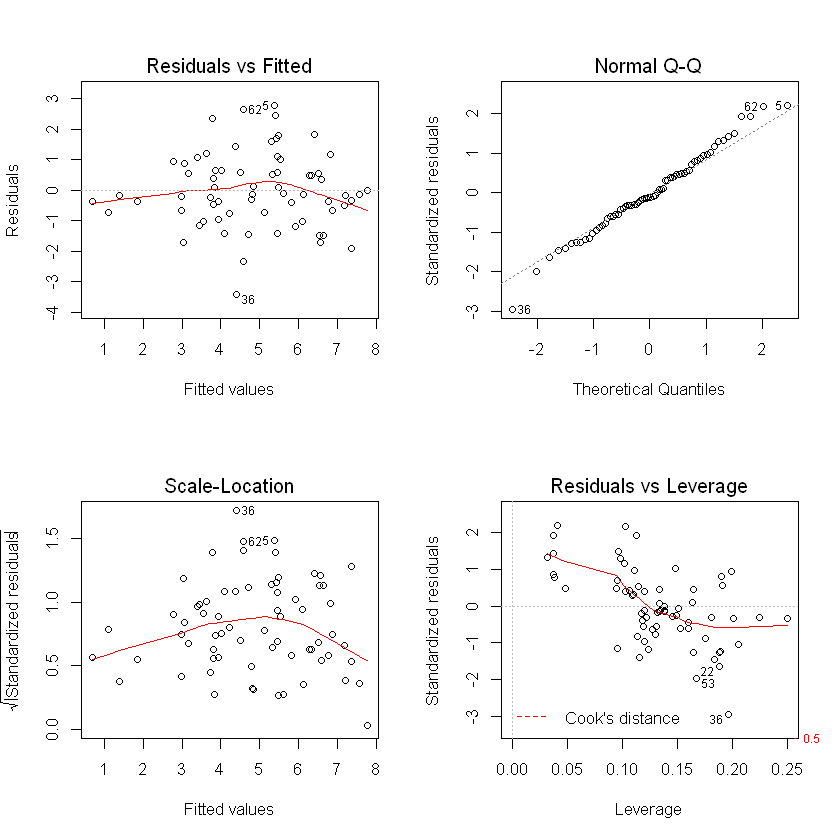

In [39]:
#-----------------Model Diagnostic Plots--------------------
# Checking suitability for linear regression
par(mfrow=c(2,2))
plot(m2)

In [40]:
#---------------RMSE for train and test set------------------
RMSE.m2.train <- sqrt(mean(residuals(m2)^2))  # RMSE on trainset based on m2 model
summary(abs(residuals(m2)))  # Check Min Abs Error and Max Abs Error

# Apply model from trainset to predict on testset
testset <- lapply(testset,as.numeric)
predict.m2.test <- predict(m2, newdata = testset)
testset.error <- testset$GDP_Growth - predict.m2.test
testset.error

# Testset Errors
RMSE.m2.test <- sqrt(mean(testset.error^2))
summary(abs(testset.error))

RMSE.m2.train #1.201735
RMSE.m2.test #1.065562

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001473 0.370116 0.697221 0.941588 1.426373 3.412714 

1           2           3           4           5           6 
-1.23654181 -0.54341612  0.41572365 -0.20573209  0.12565233 -0.21373205 
          7           8           9          10          11          12 
 0.55123262  0.48156626 -0.78513248 -1.59640682 -1.52353501 -1.75511722 
         13          14          15          16          17          18 
 1.12739966 -0.75415579  0.36811602 -0.26347894  0.04297498 -0.13937830 
         19          20          21          22          23          24 
 1.56339961  0.66551226  1.22226944  0.72685554 -0.54084953  1.53815057 
         25          26          27          28          29          30 
 0.06874244  0.13854373 -1.40928256 -3.34368115 -0.17195654  0.07634033

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04297 0.20773 0.54732 0.78650 1.23297 3.34368 

[1] 1.201735

[1] 1.065562

# EIU Baseline Model

In [43]:
# Import file using fread
data5 <- fread("standardised_final_asia_dataset.csv")

# Keep only:
# GDP_Growth, Market_Size, Life_Exp, Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,Domestic_credit_to_private_sector
# as they are similar to what EIU uses
data6 = subset(data5, select = c(GDP_Growth, Market_Size, Life_Exp, Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,Domestic_credit_to_private_sector) )
data6[data6 == "NULL"] = NA
data6<- na.omit(data6)
str(data6)

Classes 'data.table' and 'data.frame':	129 obs. of  9 variables:
 $ GDP_Growth                       : num  2.3 2.77 2.19 2.53 2.58 ...
 $ Market_Size                      : num  1.21 1.16 1.11 1.14 1.09 ...
 $ Life_Exp                         : num  1.35 1.35 1.34 1.32 1.29 ...
 $ Mean_Years_of_Schooling          : num  1.49 1.45 1.41 1.34 1.3 ...
 $ Internet_Penetration             : num  1.37 1.37 1.3 1.28 1.27 ...
 $ Gov_Indicator                    : num  1.44 1.46 1.52 1.49 1.43 ...
 $ Trade_Openness                   : num  -0.491 -0.535 -0.518 -0.495 -0.519 ...
 $ Labour_Force                     : num  0.226 0.193 0.215 0.175 0.208 ...
 $ Domestic_credit_to_private_sector: num  1.02 1.061 0.945 0.796 0.726 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [44]:
#------------------VIF----------------------
data7 <- lapply(data6,as.numeric)
m5 <- lm(GDP_Growth ~ ., data = data7)

library(car)
vif(m5) #rem Life_Exp 22.959509 

m5 <- update(m5, paste0(".~. - ",'Life_Exp'))
vif(m5) #remove Gov_Indicator 14.337795 

m5 <- update(m5, paste0(".~. - ",'Gov_Indicator'))
vif(m5) #now highest Internet_Penetration 9.272307

# Update by removing the above removed variables and assign back to data0
data6 = subset(data6, select = -c(Life_Exp,Gov_Indicator) )  

Market_Size                          Life_Exp 
                        14.739723                         22.959509 
          Mean_Years_of_Schooling              Internet_Penetration 
                        13.998070                         11.730466 
                    Gov_Indicator                    Trade_Openness 
                        14.338405                          3.751720 
                     Labour_Force Domestic_credit_to_private_sector 
                         2.017755                         10.981043

Market_Size           Mean_Years_of_Schooling 
                        12.465120                          5.883159 
             Internet_Penetration                     Gov_Indicator 
                         9.575864                         14.337795 
                   Trade_Openness                      Labour_Force 
                         3.719779                          2.015717 
Domestic_credit_to_private_sector 
                         4.200083

Market_Size           Mean_Years_of_Schooling 
                         5.462559                          4.870397 
             Internet_Penetration                    Trade_Openness 
                         9.272307                          3.151951 
                     Labour_Force Domestic_credit_to_private_sector 
                         1.988721                          4.132610

In [45]:
#---------------statistical significance------------------
#Checking adjusted r^2 of EIU surrogate cleaned data
m5 <- lm(GDP_Growth ~ ., data = data6)
summary(m5) #r2:0.3411

m5 <- update(m5, paste0(".~. - ",'Internet_Penetration')) #0.9078
summary(m5) #r2:0.3464

# m5 <- update(m5, paste0(".~. - ",'Domestic_credit_to_private_sector')) #0.0603
# summary(m5) #r2:0.3327
# Backtracked to only remove Internet_Penetration as removing Domestic_credit_to_private_sector resulted in decrease in adjusted r^2

# Update by removing the above removed variables and assign back to data0
data6 = subset(data6, select = -Internet_Penetration) 


Call:
lm(formula = GDP_Growth ~ ., data = data6)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4787 -0.8854 -0.0864  1.1347  9.1529 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        5.01671    0.17323  28.960   <2e-16 ***
Market_Size                       -0.75325    0.38067  -1.979   0.0501 .  
Mean_Years_of_Schooling           -0.62733    0.38086  -1.647   0.1021    
Internet_Penetration              -0.06004    0.51742  -0.116   0.9078    
Trade_Openness                     0.70743    0.28112   2.516   0.0132 *  
Labour_Force                       0.50454    0.22850   2.208   0.0291 *  
Domestic_credit_to_private_sector -0.47562    0.34613  -1.374   0.1719    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.915 on 122 degrees of freedom
Multiple R-squared:  0.372,	Adjusted R-squared:  0.3411 
F-statistic: 12.04 on 6 and 122 DF,  p-value: 1.353e-10



Call:
lm(formula = GDP_Growth ~ Market_Size + Mean_Years_of_Schooling + 
    Trade_Openness + Labour_Force + Domestic_credit_to_private_sector, 
    data = data6)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4318 -0.8714 -0.0788  1.1440  9.1519 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         5.0189     0.1715  29.267   <2e-16 ***
Market_Size                        -0.7690     0.3541  -2.172   0.0318 *  
Mean_Years_of_Schooling            -0.6509     0.3210  -2.028   0.0447 *  
Trade_Openness                      0.7106     0.2787   2.550   0.0120 *  
Labour_Force                        0.5023     0.2268   2.215   0.0286 *  
Domestic_credit_to_private_sector  -0.5014     0.2644  -1.896   0.0603 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.908 on 123 degrees of freedom
Multiple R-squared:  0.3719,	Adjusted R-squared:  0.3464 
F-statistic: 14.57 

In [46]:
#------------------train-test split----------------------
set.seed(400)

# 7/3 split
train <- sample.split(Y = data6$GDP_Growth, SplitRatio = 0.7)
trainset <- subset(data6, train == T)
testset <- subset(data6, train == F)

# Checking the distribution of Y is similar in trainset vs testset.
summary(trainset$GDP_Growth)
summary(testset$GDP_Growth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3232  3.7510  5.5001  5.3059  6.8758 14.5256 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1154  2.8685  5.0698  4.5622  6.0218 10.6359 

In [47]:
#----------------Develop model on trainset------------------
trainset <- lapply(trainset,as.numeric)
m6 <- lm(GDP_Growth ~ Market_Size+Mean_Years_of_Schooling+Trade_Openness+Labour_Force+Domestic_credit_to_private_sector, data = trainset)
summary(m6) #r^2: 0.3367 

residuals(m6) 
# Residuals = Error = Actual mpg - Model Predicted mpg


Call:
lm(formula = GDP_Growth ~ Market_Size + Mean_Years_of_Schooling + 
    Trade_Openness + Labour_Force + Domestic_credit_to_private_sector, 
    data = trainset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0730 -0.9324 -0.0982  1.0338  8.5786 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         5.2374     0.2024  25.871   <2e-16 ***
Market_Size                        -0.7976     0.3959  -2.015   0.0471 *  
Mean_Years_of_Schooling            -0.6778     0.3679  -1.842   0.0689 .  
Trade_Openness                      0.8589     0.3212   2.674   0.0090 ** 
Labour_Force                        0.3959     0.2731   1.450   0.1509    
Domestic_credit_to_private_sector  -0.4454     0.3190  -1.396   0.1663    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.895 on 84 degrees of freedom
Multiple R-squared:  0.374,	Adjusted R-squared:  0.3367 
F-statistic: 10.04

1            2            3            4            5            6 
-0.178904374  0.293973388 -0.181545352  1.093423562 -0.424431082 -0.879498815 
           7            8            9           10           11           12 
 2.119953194  1.820885392  1.236786565  1.076310296 -0.234897394  0.329549085 
          13           14           15           16           17           18 
 0.232601952  1.278702282  1.884584372  1.950537835  1.876678943  2.263014803 
          19           20           21           22           23           24 
 2.258598121  3.806571869 -1.329958864  1.118812611  2.737628862  2.396906812 
          25           26           27           28           29           30 
 1.664503332  0.512804461 -0.851414738 -0.876118064 -1.101156998 -0.561001105 
          31           32           33           34           35           36 
-0.141015034 -1.885003425 -1.695605900 -0.340704800 -0.941530102  1.498547454 
          37           38           39           40           41           42 
-0.413681610 -0.116899237  0.837437711 -0.457512364  0.108578097  0.895754559 
          43           44           45           46           47           48 
 0.236797392  1.939605126 -0.542825941  0.861773812  1.226627425  0.176165682 
          49           50           51           52           53           54 
-1.448039443  2.128323527  0.640706362  0.724418369  0.568340744  0.583550464 
          55           56           57           58           59           60 
-5.073040035 -0.194641638 -0.589538344 -1.434967198 -1.473719634 -2.706479860 
          61           62           63           64           65           66 
 0.778677645  1.051435469  1.126095075 -2.022318255 -2.941365046 -0.904865154 
          67           68           69           70           71           72 
 0.002918297 -1.205965664 -1.096750290  0.549179626  8.578646630 -2.099591755 
          73           74           75           76           77           78 
-1.118000476 -0.079488979  0.504558406  0.442715731 -3.262140027 -1.531596268 
          79           80           81           82           83           84 
-2.455448608 -5.064645747 -3.448229126  0.940142408  0.981052234 -0.323212064 
          85           86           87           88           89           90 
-0.351317807 -0.571633872 -0.742853702 -2.155387376 -1.148129321 -0.737805094

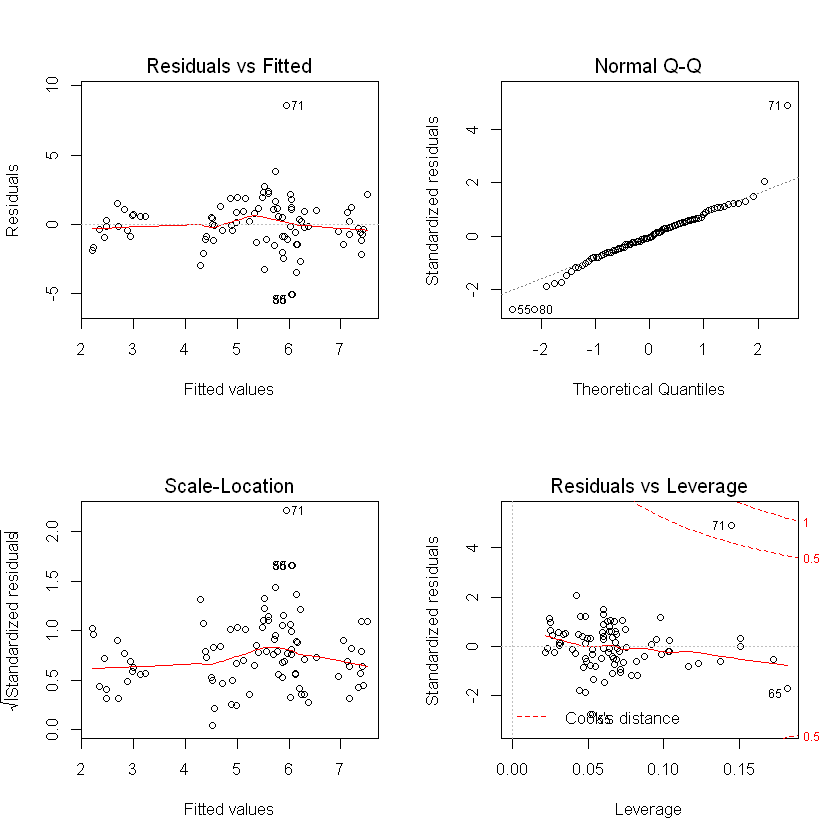

In [48]:
#-----------------Model Diagnostic Plots--------------------
par(mfrow=c(2,2))
plot(m6)

In [51]:
#---------------RMSE for train and test set------------------
RMSE.m6.train <- sqrt(mean(residuals(m6)^2))  # RMSE on trainset based on m2 model.
summary(abs(residuals(m6)))  # Check Min Abs Error and Max Abs Error.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002918 0.520310 1.016244 1.318553 1.862731 8.578647 

In [52]:
# Apply model from trainset to predict on testset.
testset <- lapply(testset,as.numeric)
predict.m6.test <- predict(m6, newdata = testset)
testset.error <- testset$GDP_Growth - predict.m6.test
testset.error

# Testset Errors
RMSE.m6.test <- sqrt(mean(testset.error^2))
summary(abs(testset.error))

RMSE.m6.train #1.830851
RMSE.m6.test #1.991584

1            2            3            4            5            6 
-0.421106314 -0.213527960  0.456817695 -0.242705946 -0.710329404  1.815470591 
           7            8            9           10           11           12 
 2.057017832  4.835976346  1.345962691 -0.514666382 -0.847364248  2.410314688 
          13           14           15           16           17           18 
-0.779130678 -0.858582327 -1.083091711 -0.223847925 -0.142551761 -1.869453351 
          19           20           21           22           23           24 
 0.002928001 -1.048939845 -1.920678641 -2.681716323 -0.485534551 -0.095078908 
          25           26           27           28           29           30 
-0.523893245 -1.830878546 -3.467636423 -4.603163556  1.367805621 -1.922226291 
          31           32           33           34           35           36 
-1.310341988 -0.539238012 -0.948663192 -1.622323311 -2.821982456 -5.670417808 
          37           38           39 
-1.118517418 -1.533070512 -2.050402271

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002928 0.519280 1.118517 1.497266 1.921452 5.670418 

[1] 1.830851

[1] 1.991584